In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
HOUSING_PATH=""

In [88]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

## Know about the data through descriptive analysis:
Functions/Attributes used:
* head:to know few samples of data
* columns:to specify the columns in data
* info:to know about characteristics of each column
* describe: to know about the stats of each column

In [89]:
housingDataFrame=load_housing_data()
#To output the first few rows of the data frame to take a quick look at it.
housingDataFrame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [90]:
#To know about the information about the data frame mainly the type of attributes and the count.
housingDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
#To know about the frequency distribution of the attribute we can use the value_counts funtion.
housingDataFrame["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [93]:
#To know about the various attributes of the numerical features such as mean,std deviation,percentiles we use 
#describe() This can also show whether if there was any scaling/normalization done on the features.
housingDataFrame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


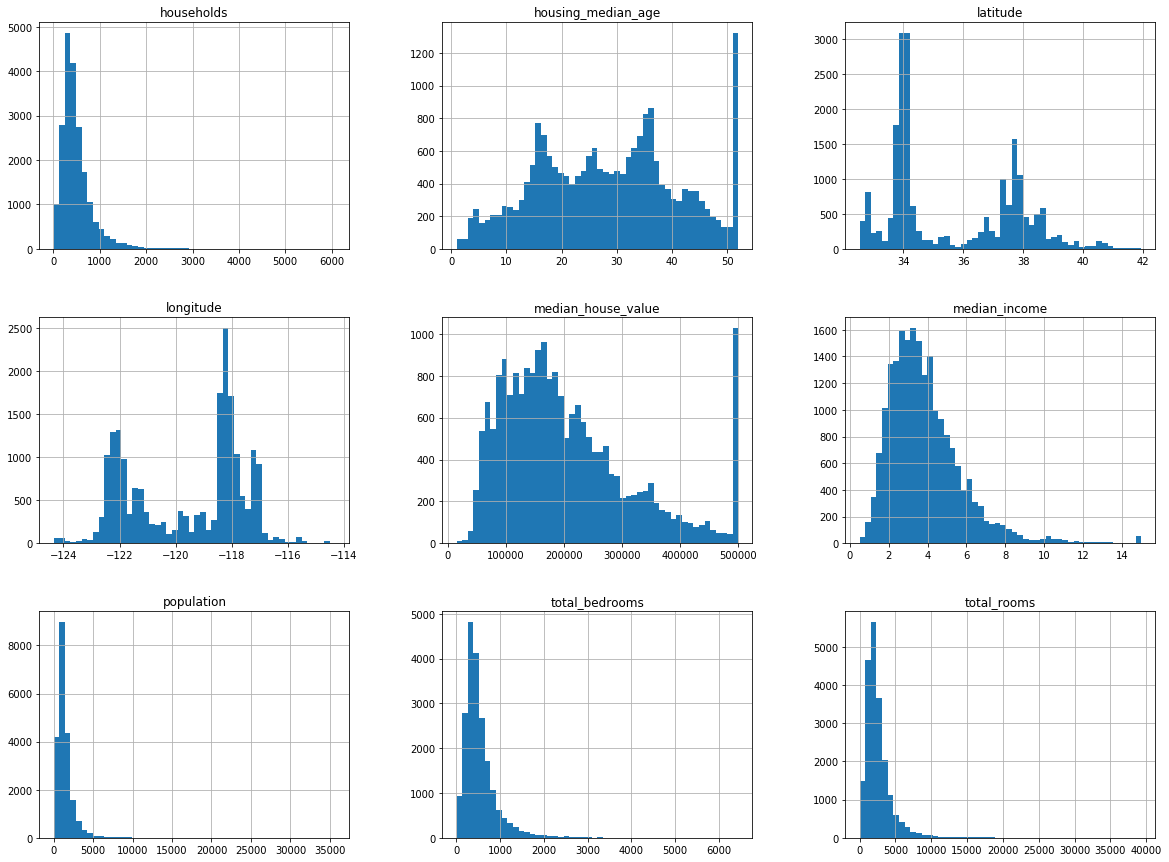

In [94]:
%matplotlib inline
#Used to plot the histogram of the dataframe numerical features to know the overall distribution.
#This can also show whether if there was any scaling/normalization done on the features on close observation.
housingDataFrame.hist(bins=50,figsize=(20,15))
plt.show()

In [95]:
def split_data(data,test_ratio,random_state):
    np.random.seed(random_state)
    shuffled_indices=np.random.permutation(len(data))
    test_data_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_data_size]
    train_indices=shuffled_indices[test_data_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [96]:
train_set,test_set=split_data(housingDataFrame,0.2,42)
print("train set size:",len(train_set)," test set size:",len(test_set))

('train set size:', 16512, ' test set size:', 4128)


In [97]:
#train_test_split provides same functionality as split_data function defined above and easy to use
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housingDataFrame,test_size=0.2,random_state=42)

** Stratified Sampling:** 
* The population is divided into homogenuous sub groups called strata and the right number of sample from each sub group is selected in way so that it is representative of the overall population. 

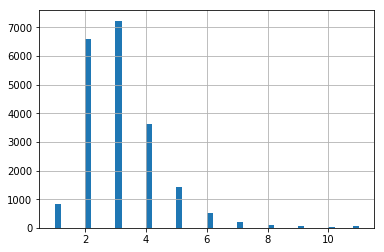

In [98]:
%matplotlib inline
housingDataFrame["income_cat"]=np.ceil(housingDataFrame["median_income"]/1.5)
housingDataFrame["income_cat"].hist(bins=50)

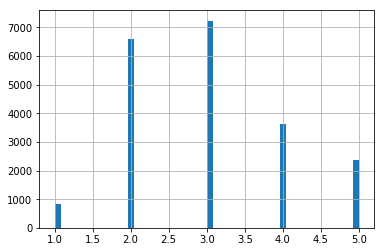

In [99]:
#By using where we are filtering out the rows that are below 5.0 and then replacing the new rows with the value 
#in the second attribute.The last attribute specifies that the change should be done in place that is the same 
#data frame
housingDataFrame["income_cat"].where(housingDataFrame["income_cat"] < 5.0,5.0,inplace=True)
housingDataFrame["income_cat"].hist(bins=50)

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housingDataFrame,housingDataFrame["income_cat"]):
    strat_train_set=housingDataFrame.loc[train_index]
    strat_test_set=housingDataFrame.loc[test_index]

In [101]:
housingDataFrame["income_cat"].value_counts()/len(housingDataFrame)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [102]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [103]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [104]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [105]:
#drop function used to drop the values in one of the axis and the value 1 denotes column and value 0 denotes row.
strat_train_set.drop(["income_cat"],axis=1,inplace=True)
strat_test_set.drop(["income_cat"],axis=1,inplace=True)

In [106]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [107]:
housing=strat_train_set.copy()

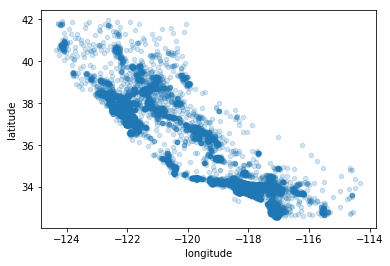

In [108]:
#alpha denotes the intensity of the graph
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)

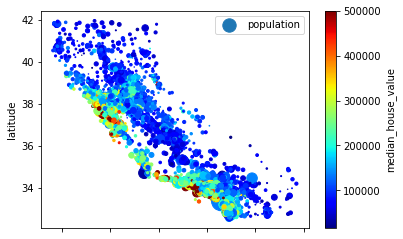

In [109]:
#argument c denotes the color of the plot based on a feature and the color scaling is choosen based on the 
#cmap attribute below
#argument s denotes the size of each point on the plot
housing.plot(kind="scatter",x="longitude",y="latitude",s=housing["population"]/100,c="median_house_value",label="population",cmap=plt.get_cmap("jet"),colorbar=True)

In [110]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17ce4610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1989c610>]], dtype=object)

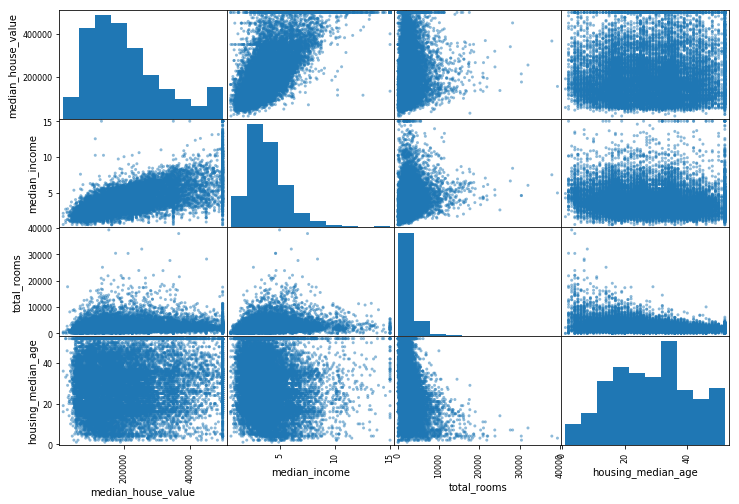

In [111]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

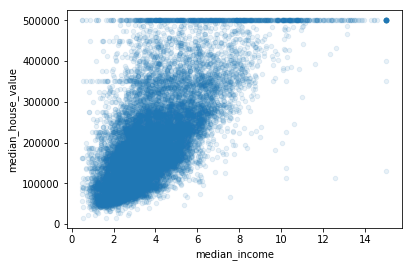

In [112]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [113]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [114]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [115]:
housing=strat_train_set.drop(["median_house_value"],axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

** Imputer**
* Scikit Learn Class to take care of missing values
* This involves creation of imputer class based on a strategy for instance "median"
* Then we take the current data frame and drop all non numeric values
* Then the imputer instance is fit on this modified data
* Now the statistics_ variable will be array containing the strategy values for each column which can be later used on
  current missing values or otherwise.

In [116]:
from sklearn.preprocessing import Imputer
imputer =Imputer(strategy="median")
housing_num=housing.drop(["ocean_proximity"],axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [117]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [118]:
# To Transform the dataframe's missing values ; this gives a numpy array as result
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

* Scikit Learn mainly serves three types of functions:

**Estimators**
* These have only one method fit() and they have take a dataset or two as parameter.The second one is the labels dataset in case of the supervised algorithms 
* These are used to estimate a value for instance median of an attribute and store it
* Example is imputer

**Transformers**
* These have two methods transform() and fit_transform() which take dataset as parameter.
* Exmaple is imputer

**Predictors**
* These normally have two methods predict() and score(). predict() returns corresponding prediction of the dataset. score() measures the quality of the predictions.
* Example is LinearRegression

**Common Charateristic**
* All hyperparameter are to be passed via constructor parameters

** LabelEncoder **
* This is scklearn transformer for transforming text-categorised attributes to integer valued ones.
* But the algorithm assumes two nearby values are similar to each other and this may not be always true.

** OneHotEncoder **
* scklearn transformer
* So the best way to tackle the above difficulty is to have binary values features corresponding to each category in the text-categorised feature.
* OneHotEncoder enables us to do so by converting the above resulted value to Scipy sparse matrix representing binary values for each category.
* Scipy sparse matrix is used to store the locations of 1 instead of storing the entire array as there will be only one "one" in entire row.
* This can be converted to array by applying toarray() on scipy sparse matrix

** LabelBinarizer **
* scklearn transformer
* This gives the functionalities of above methods combined and provides the binary valued numpy array by default

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat= housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(encoder.classes_)
housing_cat_encoded

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([0, 0, 4, ..., 1, 0, 3])

In [120]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
# Here reshape specifies that the number of columns in the reshaped one is limited to 1 and -1 denotes numpy to figure 
#it out itself
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [121]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

** Custom Transformers **
* These transformers need to seamless integrate with sklearn pipeline for better execution of code
* So need to create a class which has three methods: fit(),transform() , fit_transform()
* By adding TransformerMixin as base class we can bypass fit_transform() function
* By adding BaseEstimator as base class we will get two extra methods get_params() and set_params() for tuning hyper parameters

In [122]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,4]/X[:,3]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [123]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
attr_adder.transform(housing.values)

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

** Pipeline **
* Sklearn provides pipeline as a means to apply different estimators/transformers in a serialized manner.
* All but the last one must be transformers i.e they must have fit_transform() method

**Feature Union**
* This helps in getting together the pipelines for categorical attributes and numerical attributes into single entity

In [124]:
from sklearn.base  import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values #returning numpy array

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import CategoricalEncoder

num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector",DataFrameSelector(num_attribs)),
    ("imputer",Imputer(strategy="median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())])
cat_pipeline = Pipeline([
    ("selector",DataFrameSelector(cat_attribs)),
    ("encoder",CategoricalEncoder(encoding="onehot-dense"))
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)])

In [126]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [127]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** Important Note **
* while passing through the data transformation pipeline the fit_transform needs to be applied only on the training data and later only transform needs to be applied on test data 
* This is because when the fit() function is called the strategy and other values are set and also by definition the pipeline needs to fit only on training data and needs to be applied for transform directly on the test data

In [128]:
some_data=housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
#print(some_data)
#print(some_labels)
some_data_prepared=full_pipeline.transform(some_data)
print(some_data_prepared)
print("predictions are :",lin_reg.predict(housing_prepared))

[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
  -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.          0.
   0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
  -1.02222705  1.33645936  0.21768338 -0.03353391 -0.83628902  1.          0.
   0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 -0.31365989 -0.15334458 -0.43363936
  -0.0933178  -0.5320456  -0.46531516 -0.09240499  0.4222004   0.          0.
   0.          0.          1.        ]
 [-0.01706767  0.31357576 -0.29052016 -0.36276217 -0.39675594  0.03604096
  -0.38343559 -1.04556555 -0.07966124  0.08973561 -0.19645314  0.          1.
   0.          0.          0.        ]
 [ 0.49247384 -0.65929936 -0.92673619  1.85619316  2.41221109  2.72415407
   2.57097492 -0.44143679 -0.35783383 -0.00419445  0.2699277   1.          0.
   0.          0.          0.        ]]
('predictions are :', array([ 210644.6045928

In [129]:
from sklearn.metrics import mean_squared_error
predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(predictions,housing_labels)
lin_rmse=np.sqrt(lin_mse)
print("The root mean square error between the predictions and actual data for training set:",rmse)

NameError: name 'rmse' is not defined

In [130]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
predictions=tree_reg.predict(housing_prepared)
tree_rmse=np.sqrt(mean_squared_error(predictions,housing_labels))
print("The root mean square error between the predictions and actual data for training set:",tree_rmse)

('The root mean square error between the predictions and actual data for training set:', 0.0)


In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [132]:
def display(scores):
    print("Scores",scores)
    print("Mean:",np.mean(scores))
    print("Standard deviation:",np.std(scores))
    
display(rmse_scores)

('Scores', array([ 69327.01708558,  65486.39211857,  71358.25563341,  69091.37509104,
        70570.20267046,  75529.94622521,  69895.20650652,  70660.14247357,
        75843.74719231,  68905.17669382]))
('Mean:', 70666.746169048056)
('Standard deviation:', 2928.322738055112)


In [133]:
scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
display(np.sqrt(-scores))

('Scores', array([ 66782.73843989,  66960.118071  ,  70347.95244419,  74739.57052552,
        68031.13388938,  71193.84183426,  64969.63056405,  68281.61137997,
        71552.91566558,  67665.10082067]))
('Mean:', 69052.461363450828)
('Standard deviation:', 2731.6740017983475)


In [134]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
display(np.sqrt(-scores))

('Scores', array([ 52868.21871547,  49194.92340594,  51713.77716246,  55012.10310441,
        50973.88861214,  55990.4479905 ,  52298.68285092,  50953.09058463,
        54428.48087563,  53461.73225682]))
('Mean:', 52689.53455589254)
('Standard deviation:', 1980.3625701270801)


In [135]:
from sklearn.model_selection import GridSearchCV
param_grid=[{"n_estimators":[3,10,30],"max_features":[2,4,6,8]},{"bootstrap":[False],"n_estimators":[3,10],
                                                                 "max_features":[2,3,4]}]
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared,housing_labels)

/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [136]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
cv_results=grid_search.cv_results_
for mean_score,params in zip(cv_results["mean_test_score"],cv_results["params"]):
    print(np.sqrt(-mean_score),params)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
(64560.564535329228, {'max_features': 2, 'n_estimators': 3})
(55582.702283093698, {'max_features': 2, 'n_estimators': 10})
(52946.418215445177, {'max_features': 2, 'n_estimators': 30})
(60706.365850846312, {'max_features': 4, 'n_estimators': 3})
(52620.507218166313, {'max_features': 4, 'n_estimators': 10})
(50524.817385816459, {'max_features': 4, 'n_estimators': 30})
(58527.660474378092, {'max_features': 6, 'n_estimators': 3})
(52222.271025610295, {'max_features': 6, 'n_estimators': 10})
(49935.060050934459, {'max_features': 6, 'n_estimators': 30})
(58659.805116588766, {'max_

In [137]:
extra_attribs= ["rooms_per_hhold","pop_per_hhold","bedrooms_per_hhold"]
cat_one_hot_attribs=list(encoder.classes_)
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(grid_search.best_estimator_.feature_importances_,attributes),reverse=True)

[(0.32754893001195934, 'median_income'),
 (0.13835019350471953, 'INLAND'),
 (0.10531956070724346, 'pop_per_hhold'),
 (0.09139658055040592, 'bedrooms_per_hhold'),
 (0.076968776639663436, 'longitude'),
 (0.07043198869339834, 'latitude'),
 (0.05577360056115168, 'rooms_per_hhold'),
 (0.043866061924543169, 'housing_median_age'),
 (0.018063044805051474, 'total_rooms'),
 (0.01794828495917463, 'population'),
 (0.016650874220719983, 'total_bedrooms'),
 (0.015994298942109429, 'households'),
 (0.01166380333543238, '<1H OCEAN'),
 (0.0060806237459764181, 'NEAR OCEAN'),
 (0.0038394009525752966, 'NEAR BAY'),
 (0.00010397644587548846, 'ISLAND')]

In [138]:
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop(["median_house_value"],axis=1)
Y_test=strat_test_set["median_house_value"].copy()
X_test_prepared=full_pipeline.transform(X_test)
rmse=np.sqrt(mean_squared_error(final_model.predict(X_test_prepared),Y_test))
print(rmse)

47579.6806933


In [140]:
from sklearn.svm import SVR
svr=SVR()
param_grid=[{"kernel":["linear","rbf"],"C":[1.0,1.5,2.0]}]
svm_grid_search=GridSearchCV(svr,param_grid,scoring="neg_mean_squared_error",cv=5)
svm_grid_search.fit(housing_prepared,housing_labels)
svm_grid_search.best_estimator_

/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [147]:
from sklearn.model_selection import RandomizedSearchCV
param_grid=[{"kernel":["linear","rbf"],"C":[1.0,20,45,89,400,35,23,67,90,100.0]}]
svm_rangrid_search=RandomizedSearchCV(svr,param_distributions=param_grid,scoring="neg_mean_squared_error",cv=5,n_iter=20)
svm_rangrid_search.fit(housing_prepared,housing_labels)
svm_rangrid_search.best_estimator_

AttributeError: 'list' object has no attribute 'values'